# Day9. 심화과제

Req-7. 다음의 과정을 따라 advanced.ipynb 파일을 생성하고 실행을 해 보세요.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=276b07834c8b99880a0fc10b91c09903c06d605da18e569aff225f975f9ca263
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
import cv2, os
import numpy as np
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [0]:
image = fr.load_image_file("/gdrive/My Drive/colab/gg01.jpg")
face_locations = fr.face_locations(image)

In [0]:
for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 3)

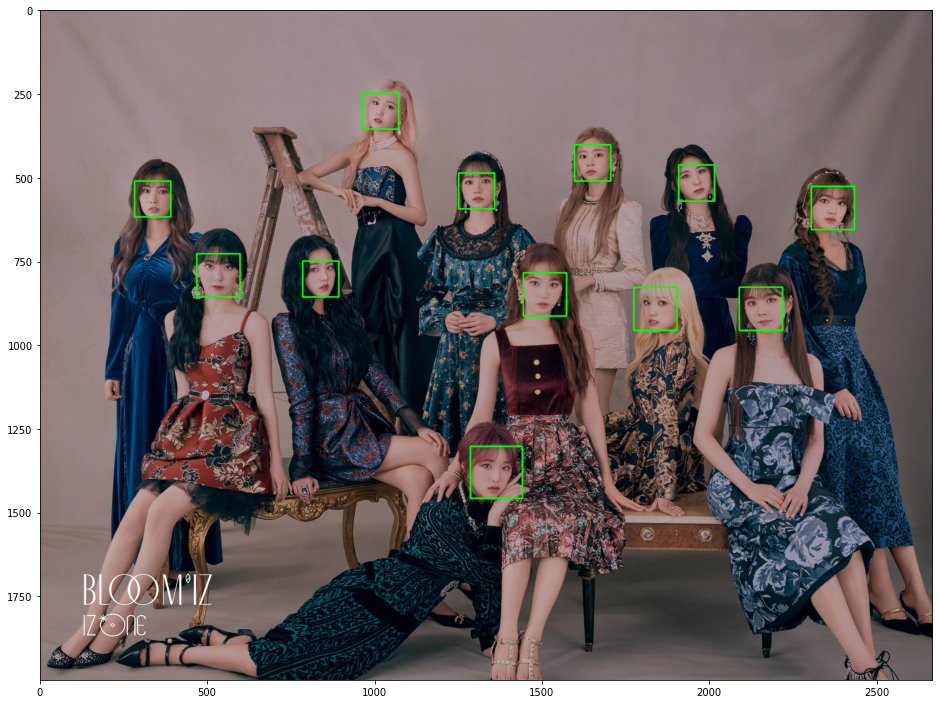

In [0]:
# 이미지 버퍼 출력
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(image)
plt.show()

Req-8. 4명의 인물사진에서 얼굴을 감지한 후 해당영역을 인코딩하여 보관합니다. 이후 새로운 인물사진을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 다음을 참고해 advanced.ipynb에 추가 후 실행해 보세요.

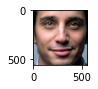

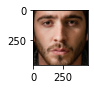

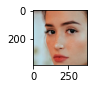

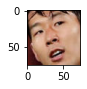

In [0]:
plt.rcParams["figure.figsize"] = (1,1)

# 이미지 파일을 로드하여 known_person_list 리스트 생성
known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person1.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person2.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person3.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person4.jpg"))

# 얼굴을 인식을 하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:
  
  # 얼굴좌표를 알아내서 잘라낸다
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]
  
  # known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:  
  plt.imshow(face)
  plt.show()

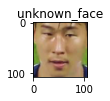

In [0]:
# 기존리스트에 없는 새로운 파일을 열어서 
unknown_person = fr.load_image_file("/gdrive/My Drive/colab/unknown.jpg")

# 얼굴좌표를 알아내서  잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

# unknown_face 이라는 타이틀을 붙여서 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

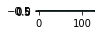

In [0]:
# unknown_person_face를 인코딩
enc_unknown_face = fr.face_encodings(unknown_face)

# 화면에 표시해보면 다음과 같다
plt.imshow(enc_unknown_face)
plt.show()

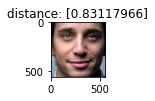

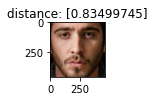

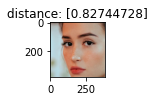

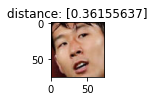

In [0]:
# 등록된 얼굴리스트를 비교
for face in known_face_list:
  
  # 등록된 얼굴을 128-dimensional face 인코딩
  enc_known_face = fr.face_encodings(face)
  
  # 등록된 얼굴과 새로운 얼굴의 distance를 얻기
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])
  
  # distance 수치를 포함한 얼굴 출력
  plt.title("distance: " + str(distance))
  plt.imshow(face)
  plt.show()